In [ ]:
"""
SETTING UP A NEW ENVIRONMENT (GEO)

conda create -n geo
conda activate geo
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install python=3 geopandas
conda install spyder
conda install folium
conda install jupyter

ipython kernel install --user --name=geo

In jupyter notebooks, you might have to change your kernel to "geo"


"""

In [1]:
import geopandas as gpd 
import contextily as ctx
import pandas as pd

# Plot a map of boston
bos = gpd.read_file("streets.json")
bos

,OBJECTID,SEGMENT_ID,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,PRE_DIR,ST_NAME,ST_TYPE,SUF_DIR,...,PLACE00_R,TRACT00_L,TRACT00_R,BLOCK00_L,BLOCK00_R,MCD00_L,MCD00_R,STREET_ID,SHAPElen,geometry
0,1,1,12,22,13,29,,A,ST,,...,07000,02127,02127,,,07000,07000,2,166.673187,"LINESTRING (-71.05674 42.34078, -71.05633 42.3..."
1,2,2,24,42,31,43,,A,ST,,...,07000,02127,02127,,,07000,07000,2,162.142997,"LINESTRING (-71.05633 42.34112, -71.05594 42.3..."
2,3,3,44,64,45,67,,A,ST,,...,07000,02127,02127,,,07000,07000,2,178.522006,"LINESTRING (-71.05594 42.34146, -71.05550 42.3..."
3,4,4,66,72,69,71,,A,ST,,...,07000,02127,02127,,,07000,07000,2,196.841018,"LINESTRING (-71.05550 42.34183, -71.05502 42.3..."
4,5,5,74,90,73,87,,A,ST,,...,07000,02127,02127,,,07000,07000,2,179.277949,"LINESTRING (-71.05502 42.34224, -71.05458 42.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,19256,7728,174,198,175,199,,Tyler,ST,,...,07000,02111,02111,,,07000,07000,4206,95.154462,"LINESTRING (-71.06189 42.34804, -71.06188 42.3..."
19256,19257,17827,,,34,18,,Edison,GRN,,...,07000,02125,02125,,,07000,07000,1338,315.235421,"LINESTRING (-71.05880 42.31933, -71.05859 42.3..."
19257,19258,1137,82,102,71,95,,Cedar,ST,,...,07000,02119,02119,,,07000,07000,740,466.992932,"LINESTRING (-71.09180 42.32599, -71.09196 42.3..."
19258,19259,15705,225,201,228,210,,Washington,ST,,...,07000,02108,02108,,,07000,07000,4354,213.424678,"LINESTRING (-71.05787 42.35804, -71.05784 42.3..."


<AxesSubplot:>

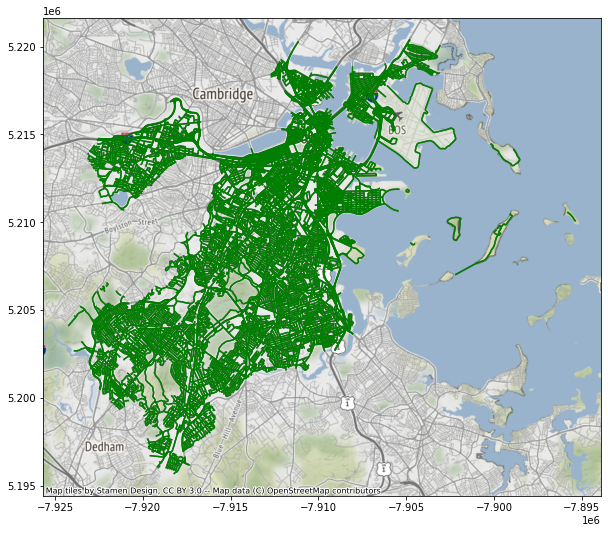

In [2]:
# sts = nbos2[(nbos2['TRACT00_L']=='02115')]
sts = bos

sts = sts.to_crs(epsg=3857)
ax = sts.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

sts.plot(color='green', markersize=1, ax=ax)

In [3]:
# extracting relevant columns
nbos = bos[['ST_NAME', 'SPEEDLIMIT', 'TRACT00_L','TRACT00_R', 'geometry',]]

# making columns for x and y coordinates
nbos['x'], nbos['y'] = zip(*nbos['geometry'].apply(lambda x: x.xy))

/opt/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [4]:
# making a column containing a list of (x,y) points on that street
def mk_pair(row):
    lstx = row['x']
    lsty = row['y']
    lstxy = []
    for i in range(len(lstx)):
        lstxy.append((lstx[i], lsty[i]))
    return lstxy

nbos['xy'] = nbos.apply(lambda row : mk_pair(row), axis=1)

In [5]:
# making a column counting the number of points on that street
nbos['npoints'] = nbos['xy'].apply(lambda lst : len(lst))

In [6]:
# removing streets with a single letter name
nbos = nbos[nbos['ST_NAME'].apply(lambda x: len(str(x))>1)]

In [7]:
nbos

,ST_NAME,SPEEDLIMIT,TRACT00_L,TRACT00_R,geometry,x,y,xy,npoints
8,Abbotsford,20,02121,02121,"LINESTRING (-71.09371 42.31496, -71.09363 42.3...","[-71.09371106946048, -71.09363047049571, -71.0...","[42.314961713525534, 42.31495388226968, 42.314...","[(-71.09371106946048, 42.314961713525534), (-7...",6
9,Abbotsford,20,02121,02121,"LINESTRING (-71.09154 42.31428, -71.09128 42.3...","[-71.09153959207599, -71.0912780077547, -71.09...","[42.3142762201258, 42.31419377536613, 42.31418...","[(-71.09153959207599, 42.3142762201258), (-71....",3
10,Abby,15,02135,02135,"LINESTRING (-71.14125 42.36128, -71.14171 42.3...","[-71.14124529527216, -71.14171023242507, -71.1...","[42.36127897510728, 42.361421745047714, 42.361...","[(-71.14124529527216, 42.36127897510728), (-71...",4
11,Acacia,20,02132,02132,"LINESTRING (-71.16057 42.27357, -71.16063 42.2...","[-71.16057144815167, -71.1606272411909, -71.16...","[42.27356688106325, 42.27358419759172, 42.2740...","[(-71.16057144815167, 42.27356688106325), (-71...",3
12,Academy,15,02119,02119,"LINESTRING (-71.09787 42.32062, -71.09788 42.3...","[-71.09787013227123, -71.09788245435792]","[42.32062111697275, 42.32103550245727]","[(-71.09787013227123, 42.32062111697275), (-71...",2
...,...,...,...,...,...,...,...,...,...
19255,Tyler,20,02111,02111,"LINESTRING (-71.06189 42.34804, -71.06188 42.3...","[-71.0618883380871, -71.06187789130286, -71.06...","[42.34804395319048, 42.34804484785439, 42.3480...","[(-71.0618883380871, 42.34804395319048), (-71....",9
19256,Edison,20,02125,02125,"LINESTRING (-71.05880 42.31933, -71.05859 42.3...","[-71.05880195260539, -71.0585881394307, -71.05...","[42.31932992095129, 42.319270101629236, 42.319...","[(-71.05880195260539, 42.31932992095129), (-71...",9
19257,Cedar,25,02119,02119,"LINESTRING (-71.09180 42.32599, -71.09196 42.3...","[-71.09180304396094, -71.0919624275023, -71.09...","[42.325992444895704, 42.32622214406506, 42.326...","[(-71.09180304396094, 42.325992444895704), (-7...",11
19258,Washington,20,02108,02108,"LINESTRING (-71.05787 42.35804, -71.05784 42.3...","[-71.05787083701374, -71.05784063003887, -71.0...","[42.35804117694145, 42.358453788356485, 42.358...","[(-71.05787083701374, 42.35804117694145), (-71...",3


In [8]:
# all the nodes in the dataframe
allpoints = list(nbos.xy)
allpoints = [i for j in allpoints for i in j]

In [9]:
# creating a dataframe of all nodes
x, y = zip(*allpoints)
x = list(x)
y = list(y)
xy = {'x':x, 'y':y}
nodes_df = pd.DataFrame(xy)
nodes_df

,x,y
0,-71.093711,42.314962
1,-71.093630,42.314954
2,-71.093441,42.314902
3,-71.092802,42.314702
4,-71.091805,42.314362
...,...,...
93365,-71.057871,42.358041
93366,-71.057841,42.358454
93367,-71.057828,42.358626
93368,-71.067424,42.341104


In [10]:
# dropping duplicates from nodes_df
nodes_df1 = nodes_df.drop_duplicates(ignore_index=True)
nodes_df1

,x,y
0,-71.093711,42.314962
1,-71.093630,42.314954
2,-71.093441,42.314902
3,-71.092802,42.314702
4,-71.091805,42.314362
...,...,...
68658,-71.092391,42.326728
68659,-71.092443,42.326747
68660,-71.092496,42.326760
68661,-71.092724,42.326819


In [11]:
# creating a df to be used in SQL
def mk_lines(df):
    street = []
    speed = []
    pin1 = []
    pin2 = []
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    
    for index, row in df.iterrows():
        for i in range(row['npoints']-1):
            street.append(row['ST_NAME'])
            speed.append(row['SPEEDLIMIT'])
            pin1.append(row['TRACT00_L'])
            pin2.append(row['TRACT00_R'])
            xlst = row['x']
            x1.append(xlst[i])
            x2.append(xlst[i+1])
            ylst = row['y']
            y1.append(ylst[i])
            y2.append(ylst[i+1])
    
    lines = {'street':street, 'speed':speed, 'pin1':pin1,'pin2':pin2, 'x1':x1, 'y1':y1, 'x2':x2, 'y2':y2}
    return pd.DataFrame(lines)

lines_dfn = mk_lines(nbos)
lines_dfn

,street,speed,pin1,pin2,x1,y1,x2,y2
0,Abbotsford,20,02121,02121,-71.093711,42.314962,-71.093630,42.314954
1,Abbotsford,20,02121,02121,-71.093630,42.314954,-71.093441,42.314902
2,Abbotsford,20,02121,02121,-71.093441,42.314902,-71.092802,42.314702
3,Abbotsford,20,02121,02121,-71.092802,42.314702,-71.091805,42.314362
4,Abbotsford,20,02121,02121,-71.091805,42.314362,-71.091540,42.314276
...,...,...,...,...,...,...,...,...
74393,Cedar,25,02119,02119,-71.092496,42.326760,-71.092724,42.326819
74394,Cedar,25,02119,02119,-71.092724,42.326819,-71.092919,42.326873
74395,Washington,20,02108,02108,-71.057871,42.358041,-71.057841,42.358454
74396,Washington,20,02108,02108,-71.057841,42.358454,-71.057828,42.358626


In [ ]:
lines_dfn['manhattan'] = abs(lines_dfn['x1']- lines_dfn['x2']) + abs(lines_dfn['y1']- lines_dfn['y2'])

In [13]:
nodes_df1.to_csv('nodes.csv')
lines_dfn.to_csv('lines.csv')